In [1]:
### 통계 기초 ###
# 중심경향성 : 평균값(mean), 중앙값(median), 최빈값(mode)
# 산포도 : 분산, 표준편차, (사분)범위
# 상관관계 : 공분산, 피어슨 상관관계 => 유사도, 추천시스템
# 상관관계 대 인과관계

In [2]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(5, 3)) # 그래프 크기 지정(픽스)

In [3]:
import platform
import matplotlib.font_manager as fm # 폰트매니저
import os
import matplotlib.pyplot as plt

!apt -qq install fonts-nanum # 나눔폰트를 설치하겠다

fe = fm.FontEntry(
    fname = r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name = 'NanumGothic')
fm.fontManager.ttflist.insert(0, fe) # matplib에 폰트를 추가해라
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'}) # 폰트 설정

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [4]:
# sns 회원 204명을 대상으로 친구가 몇명인지 조사한 결과를 리스트로 저장, 회원아이디는 친구가 많은 순서대로
# 0,1,2,... 등 으로 정렬되어 있고, 리스트의 각 항목이 해당 회원의 친구 숫자이다. 친구숫자 최대는 100, 최소 1명
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,
               15,15,15,14,14,13,13,13,13,12,12,11,10,10,
               10,10,10,10,10,10,10,10,10,10,10,10,10,9,
               9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,
               8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,
               7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
               5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
               4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,
               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [5]:
print(f"회원수:\t{len(num_friends)}명",
      f"최대 친구 숫자 : {max(num_friends)}명",
      f'최소 친구 숫자 : {min(num_friends)}', sep='\n')

회원수:	204명
최대 친구 숫자 : 100명
최소 친구 숫자 : 1


In [6]:
from collections import Counter # Counter 클래스, dict의 자식클래스, 카운트한 결과를 보관하는

In [7]:
friends_counts = Counter(num_friends) # 객체 생성

In [8]:
friends_counts # 친구의 명수

Counter({100: 1,
         49: 1,
         41: 1,
         40: 1,
         25: 1,
         21: 2,
         19: 2,
         18: 2,
         16: 1,
         15: 4,
         14: 2,
         13: 4,
         12: 2,
         11: 1,
         10: 15,
         9: 18,
         8: 13,
         7: 15,
         6: 22,
         5: 17,
         4: 20,
         3: 20,
         2: 17,
         1: 22})

In [9]:
xs = range(101) # 친구 숫자
ys = [friends_counts[x] for x in xs] # 지정된 수 만큼 친구를 갖는 회원수

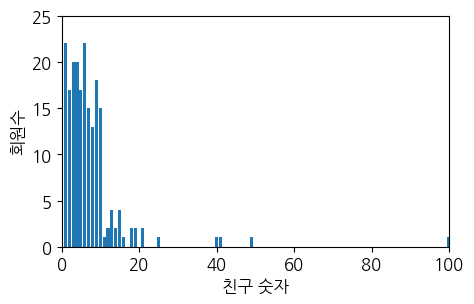

In [10]:
plt.bar(xs, ys)
plt.axis([0, 100, 0, 25]) # x, y축 눈금 지정
plt.xlabel('친구 숫자')
plt.ylabel('회원수')
plt.show()

대다수 회원이 10명 이내의 친구를 갖는다. => 중심경향성

100명의 친구를 가진 회원도 있다.

In [11]:
def mean(xs):
  return sum(xs) / len(xs)

In [12]:
mean(num_friends) # sns 친구 보유수 평균

7.333333333333333

In [13]:
#구분
def median(xs):
  if len(xs) % 2 ==0 :
    return median_even(xs)
  else :
    return median_odd(xs)
# 짝수 일떄
def median_even(xs):
  sorted_xs = sorted(xs)
  midpoint = len(xs) // 2 # 몫
  mean_value = (sorted_xs[midpoint - 1] + sorted_xs[midpoint]) / 2
  return mean_value
#홀수 일떄
def median_odd(xs):
  sorted_xs = sorted(xs)
  midpoint = len(xs) // 2
  mean_value = sorted_xs[midpoint]
  return mean_value

In [14]:
median(num_friends) # 중앙값 구하기

6.0

평균값 대 중앙값 : 예를 들어 친구 숫자를 200으로 바꾸면 평균값은 올라갈 것이다.

In [15]:
Y = num_friends.copy()
Y[0] = 200
mean(Y)
# 친구 숫자를 200으로 변경했을때 7.33 -> 7.82로 평균이 올라감

7.823529411764706

In [16]:
median(Y) # 하지만, 중앙값은 변하지 않음

6.0

In [17]:
def quantile(xs, p): # p는 상위 p% 위치
  xs_sorted = sorted(xs)
  index = int(p* len(xs))
  return xs_sorted[index]

In [18]:
print('제1사분위수:', quantile(num_friends, 0.25))
print('제4사분위수:', quantile(num_friends, 0.75))

제1사분위수: 3
제4사분위수: 9


최빈값(mode)



In [19]:
def mode(xs):
  counts = Counter(xs)
  max_count = max(counts.values())
  modes = {x_i for x_i, count in counts.items() if count == max_count}
  return modes

In [20]:
mode(num_friends)

{1, 6}

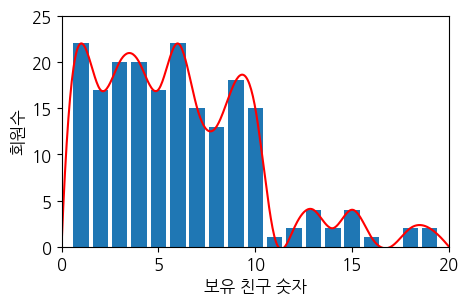

In [21]:
xs = range(21) # 친구숫자를 제한, 최소 1명에서 20명
ys = [friends_counts[x] for x in xs]

plt.bar(xs, ys)

import numpy as np
from scipy.interpolate import make_interp_spline # 부드러운선을 그리기 위한 스플라인 보간법 적용

spline = make_interp_spline(xs, ys)
xs_ = np.linspace(min(xs), max(ys), 500)
ys_ = spline(xs_)
plt.plot(xs_, ys_, 'r')

plt.axis([0, 20, 0, 25])
plt.xlabel('보유 친구 숫자')
plt.ylabel('회원수')
plt.show()
# Left skew : 평균값 < 중앙값 < 최빈값
# Right skew : 최빈값 < 중앙값 < 평균값

In [22]:
max(mode(num_friends)) <= median(num_friends) <= mean(num_friends)

True

산포도와 분산

In [23]:
def data_range(xs):
  return max(xs) - min(xs)

In [24]:
data_range(num_friends)

99

In [25]:
def iqr(xs):
  return quantile(xs, 0.75) - quantile(xs, 0.25) # 제3사분위 - 제1사분위

In [26]:
iqr(num_friends) # 사분범위

6

In [27]:
# 벡터 내적
def dotV(v, w):
  assert len(v) == len(w)
  return sum(v_i * w_i for v_i, w_i in zip(v, w))

def dev_mean(xs): # 평균값과 차이
  mu = mean(xs)
  return [x - mu for x in xs]

def sum_of_squares(v):
  return dotV(v, v)

In [28]:
def var(xs):
  assert len(xs) >= 2  # 두개 이상 데이터 필요
  n = len(xs)
  dev = dev_mean(xs)
  dev_sum = sum_of_squares(dev)
  return dev_sum / (n-1)

In [29]:
var(num_friends) # 분산구하기

81.54351395730716

In [30]:
import math
def std(xs):
  return math.sqrt(var(xs))

In [31]:
std(num_friends) # 표준편차

9.03014473623248

분산과 표준편차는 평균값에 의존적이다. 평균값 이상치에 영향을 받는만큼 따라서 영향을 받는다.

선형 상관관계

In [32]:
# 두 종류 데이터 사이의 어떤 상관이 있느지를 파악할때
# 공분산, 피어슨 상관계수 => 선형 상관관계(한 쪽이 작아지거나, 커질경우 => 비례)

In [33]:
# sns 소비 시간
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,
                 31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,
                 36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,
                 23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,
                 26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,
                 27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,
                 23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,
                 31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,
                 29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,
                 35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,
                 19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,
                 15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,
                 18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,
                 41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,
                 27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,
                 36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,
                 28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,
                 36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,
                 33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,
                 13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,
                 28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,
                 30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,
                 17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,
                 33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [34]:
# 공분산 : 두 데이터의 각각 평균값을 기준으로 어떻게 연관되어 있는지 계산 => 양, 음, 0에 가까운지

<div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/positive_negative_weak_covariance.png" width="60%"></div>

<br>

In [35]:
def cov(xs, ys):
  assert len(xs) == len(ys)

  return dotV(dev_mean(xs), dev_mean(ys)) / (len(xs) - 1)

In [36]:
cov(num_friends, daily_minutes) # 친구 숫자와 sns 사용시간 사이의 공분산은 22.43 정도이다.

22.425435139573064

In [37]:
# 공분산의 한계점 : 공분산이 크다고 해서 상관관계가 강하다라고는 단정지을 수는 없다.
# 피어슨 상관계수 : 공분산을 각 데이터셋의 표준편차의 곱으로 나눔(선형 상관관계를 계산, 공분산의 한계 해결)
# -1 ~ 1의 값이다, 1에 가까울 수록 양의 선형관계가 강해진다, -1 : 음의 상관관계가 강해짐, 0에 가까울수록 선형관계 약해진다

In [38]:
def corrcoef(xs, ys):
  assert len(xs) == len(ys)

  std_x = std(xs) # xs의 표준편차
  std_y = std(ys) # ys의 표준편차

  if std_x > 0 and std_y > 0:
    return cov(xs, ys) / (std_x * std_y)
  else:
    return 0 # 표준편차가 0인 데이터셋과 선형 상관관계는 없음

In [39]:
corrcoef(num_friends, daily_minutes)

0.24736957366478216

Text(0, 0.5, 'SNS 사용 시간')

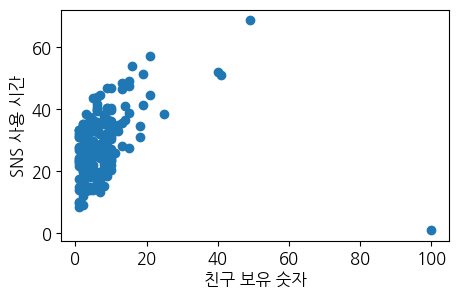

In [40]:
plt.scatter(num_friends, daily_minutes) # 산점도 그래프 그리기
plt.xlabel('친구 보유 숫자')
plt.ylabel('SNS 사용 시간')

In [41]:
outlier = num_friends.index(100) # 이상치 인덱스

# 데이터셋에서 이상치 제거
num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]
print(num_friends_good[0], num_friends_good[0], type(num_friends_good[0]), type(num_friends_good[0]))
daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]

corrcoef(num_friends_good, daily_minutes_good)

49 49 <class 'int'> <class 'int'>


0.5736792115665573

Text(0, 0.5, 'SNS 사용 시간')

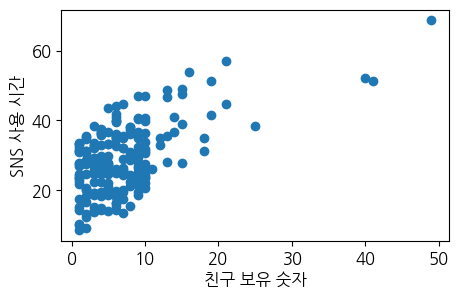

In [42]:
plt.scatter(num_friends_good, daily_minutes_good) # 산점도 그래프 그리기
plt.xlabel('친구 보유 숫자')
plt.ylabel('SNS 사용 시간')

In [43]:
# 이런 데이터들로는 상관관계를 측정할 수 없다.
x = [-2, -1, 0 ,1 , 2]
y = [2, 1, 0, 1, 2]
corrcoef(x, y)

0.0

In [44]:
x1 = [-2, -1, 0 ,1 , 2]
y1 = [99.98, 99.99, 100, 101.01, 100.02]
corrcoef(x1, y1)

0.38390264701787247

In [45]:
# 상관관계와 인과관계 : 두 데이터셋이 상관관계가 있다고 해서 서로 영향을 주는 인과관계가 있다고는 할 수 없다.
# (다른 영향 주는 외부요인이 있을 수 있기 때문)
# 시나리오
# 1. sns에서 많은 시간을 보낼 수록 많은 친구를 사귄다(있다)
# 2. 많은 친구가 있으니까 sns에서 시간을 많이 보낸다.
# 3. sns에서 많은 정보를 얻으니까, 사용시간이 길어지고 그러다 보니 친구가 늘어난다.

In [46]:
# 선형회귀 : 독립변수를 사용한다.
# scikit-learn

In [47]:
from sklearn import linear_model

xs = np.c_[np.array(num_friends_good)]
ys = np.c_[np.array(daily_minutes_good)]

lin_model = linear_model.LinearRegression() # 선형회귀 객체 생성
lin_model.fit(xs, ys) # 모델 피팅

t0, t1 = lin_model.intercept_[0], lin_model.coef_[0][0]
print(f'절편: {t0}')
print(f'기울기: {t1}')

절편: 22.947552413468976
기울기: 0.9038659456058723


Text(0, 0.5, 'SNS 사용 시간')

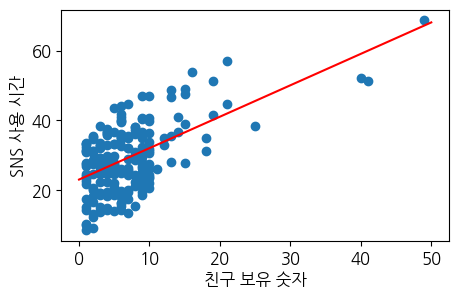

In [48]:
plt.scatter(num_friends_good, daily_minutes_good) # 산점도 그래프 그리기

X = np.linspace(0, 50, 100) # 직선 그리기
plt.plot(X, t0 + t1*X, "r")
plt.xlabel('친구 보유 숫자')
plt.ylabel('SNS 사용 시간')